In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
path='C:\\Users\\amitn\\Downloads\\Dataset for project\\Kaggle Competiotion\\Regression\\House Price\\train.csv'
test_path='C:\\Users\\amitn\\Downloads\\Dataset for project\\Kaggle Competiotion\\Regression\\House Price\\test.csv'

# New Method for Imputing Missing Values Using Regression Techniques
* This approach enhances the precision of the imputed values.
* I've utilized the Random Forest Regressor to predict the missing values.
* The function requires the following inputs:
    * The dataset,
    * The feature that contains missing values,
    * The features that will be used to predict the missing values.
* The features for prediction should be selected based on their high correlation with the feature that has missing values.

In [3]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def fillmissing_with_prediction_multilinear(data, features, topredict):
    """
    Imputes missing values in a dataset using a Random Forest Regressor model.

    This function takes a DataFrame with missing values and predicts those
    values using specified features. The predictions are based on a Random
    Forest Regressor trained on non-missing data. The function also returns
    evaluation metrics for the regression model.

    Parameters:
    - data (DataFrame): The dataset containing missing values.
    - features (list): The list of feature names used to predict the missing values.
    - topredict (str): The name of the feature with missing values to be imputed.

    Returns:
    - str: A string displaying the Mean Absolute Error (MAE), Root Mean Squared Error (RMSE),
      and R2 Score of the model based on a test set.

    Example usage:
    ```python
    imputation_result = fillmissing_with_prediction_multilinear(data, ['feature1', 'feature2'], 'target_feature')
    print(imputation_result)
    ```
    """
    missing_mask = data[topredict].isnull()

    # Separate features and target
    X = data[~missing_mask][features]
    y = data[~missing_mask][topredict]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

    # Train the Random Forest Regressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predict the missing values
    missing_index = data[missing_mask].index
    predicted_values = model.predict(data.loc[missing_index, features])

    # Fill the missing values in the original dataframe
    data.loc[missing_index, topredict] = predicted_values

    # Evaluate the model
    mae = mean_absolute_error(y_test, model.predict(X_test))
    rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2 = r2_score(y_test, model.predict(X_test))

    return f"MAE: {mae}, RMSE: {rmse}, R2 Score: {r2}"

In [4]:
dataset=pd.read_csv(path)
dataset['Number_of_years']=dataset['YrSold']-dataset['YearBuilt']
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Number_of_years
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,8
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,32
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,69
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,60


# Preprocessing

In [5]:
categorial_cols=dataset.select_dtypes(include=['object']).columns
catdf=dataset[categorial_cols]
catdf=catdf.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)
catdf

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


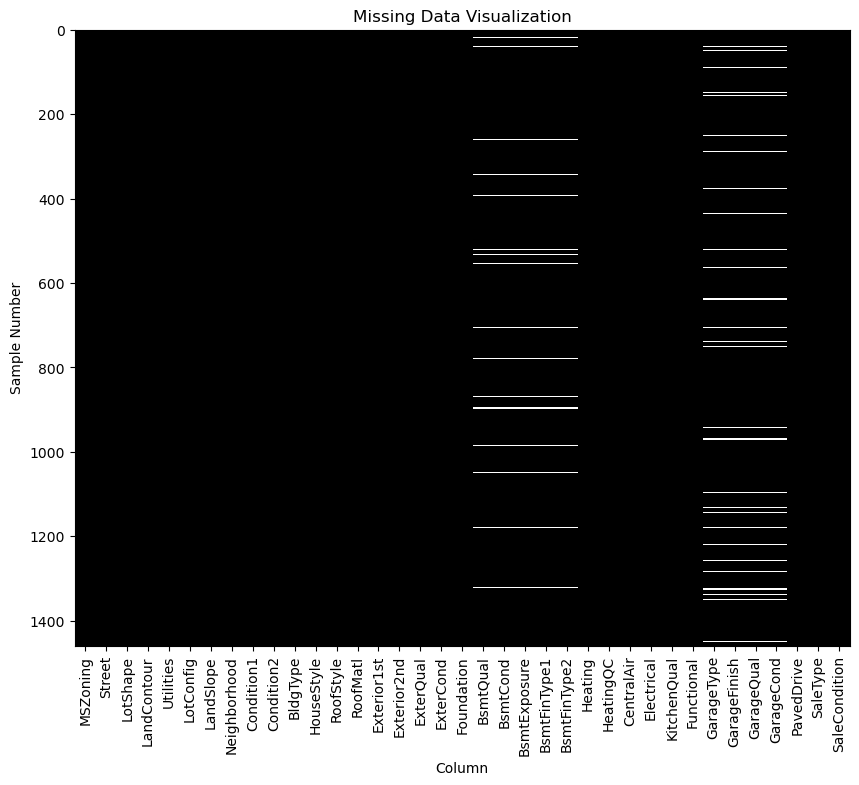

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64


In [6]:
def null_visualization(data):
    import pandas as pd
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
    plt.xticks(ticks=range(len(data.columns)), labels=data.columns, rotation=90)

    plt.xlabel("Column")
    plt.ylabel("Sample Number")
    plt.title("Missing Data Visualization")

    plt.show()
    print(data.isna().sum())
null_visualization(catdf)

In [7]:
catdf2=pd.get_dummies(catdf,columns =catdf.columns, drop_first=True)
catdf2

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1458,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [8]:
numerical_cols = dataset.select_dtypes(include=['float','int64']).columns
numdf = dataset[numerical_cols]
numdf['MasVnrArea']=numdf['MasVnrArea'].fillna(0)
fillmissing_with_prediction_multilinear(numdf,['YearBuilt','YearRemodAdd'],'GarageYrBlt')
fillmissing_with_prediction_multilinear(numdf,['1stFlrSF','LotArea','GrLivArea'],'LotFrontage')


C:\Users\amitn\AppData\Local\Temp\ipykernel_25740\1083412197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numdf['MasVnrArea']=numdf['MasVnrArea'].fillna(0)


'MAE: 12.303076923076922, RMSE: 15.265325716497806, R2 Score: 0.35196968011584284'

In [9]:
result_df = pd.concat([numdf, catdf2], axis=1)

In [10]:
result_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,0,1,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,0,1,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,0,1,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,0,1,0,0,0,1,0


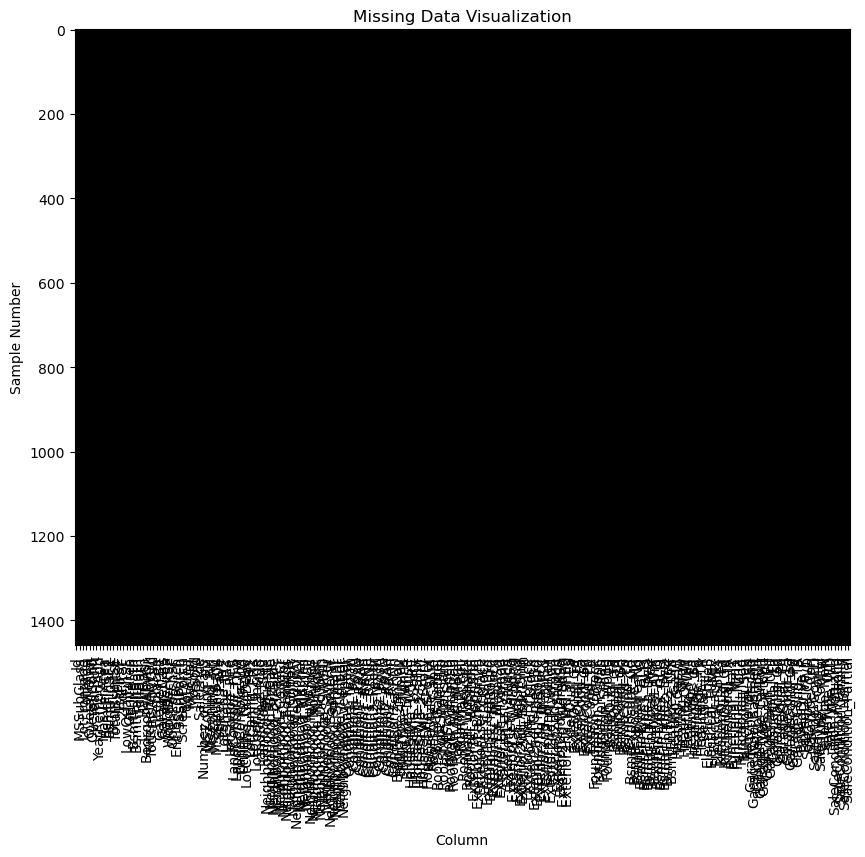

Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 232, dtype: int64


In [11]:
null_visualization(result_df)

In [12]:
result_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [13]:
result_df=result_df.drop(columns=['Utilities_NoSeWa', 'RoofMatl_CompShg', 'Condition2_RRAn',
              'GarageQual_Fa', 'RoofMatl_Roll', 'Condition2_RRAe', 
              'RoofMatl_Metal', 'HouseStyle_2.5Fin', 'Exterior2nd_Other', 
              'Electrical_Mix', 'Heating_OthW', 'Condition2_RRNn', 
              'RoofMatl_Membran', 'Exterior1st_Stone', 'Heating_GasA',
              'Exterior1st_ImStucc'],axis=1)

In [14]:
result_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [15]:
result_df["LogPrice"] = np.log(result_df["SalePrice"])
result_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LogPrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,1,0,12.247694
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,1,0,12.109011
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,1,0,12.317167
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,0,0,0,0,0,11.849398
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,1,0,12.072541
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,1,0,12.254863
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,1,0,12.493130
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,1,0,11.864462


# XGBoost Model 

* r2:  0.9173767213999846
* rmse:  25899.47109980913
* mse:  670782603.2498484


In [16]:
X=result_df.drop(columns=['Id','LogPrice','SalePrice'],axis=1)
y=result_df['SalePrice']
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)


import xgboost as xgb
# Create a XGBoost object
xgb_reg = xgb.XGBRegressor(learning_rate=0.01,n_estimators=20000,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.006)
# Fit the model to the training data
xgb_reg.fit(X_train, y_train)

r2 = r2_score(y_test, xgb_reg.predict(X_test))
print('r2',r2)
rmse = np.sqrt(mean_squared_error(y_test, xgb_reg.predict(X_test)))
print('rmse',rmse)
mse=mean_squared_error(y_test, xgb_reg.predict(X_test))
print('mse',mse)

C:\Users\amitn\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [00:49:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


r2 0.9174765473995171
rmse 25883.820413691887
mse 669972159.2082528


# TEST

In [17]:
dataset=pd.read_csv(test_path)
dataset['Number_of_years']=dataset['YrSold']-dataset['YearBuilt']
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Number_of_years
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,49
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,52
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,13
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,12
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,36
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,36
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,46
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,14


In [18]:
categorial_cols=dataset.select_dtypes(include=['object']).columns
catdf=dataset[categorial_cols]
catdf=catdf.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'], axis=1)
catdf

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1455,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,...,SBrkr,TA,Typ,CarPort,Unf,TA,TA,Y,WD,Abnorml
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [19]:
catdf2=pd.get_dummies(catdf,columns =catdf.columns, drop_first=True)
catdf2

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1455,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1456,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1457,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [20]:
numerical_cols = dataset.select_dtypes(include=['float','int64']).columns
numdf = dataset[numerical_cols]
numdf['MasVnrArea']=numdf['MasVnrArea'].fillna(0)
fillmissing_with_prediction_multilinear(numdf,['YearBuilt','YearRemodAdd'],'GarageYrBlt')
fillmissing_with_prediction_multilinear(numdf,['1stFlrSF','LotArea','GrLivArea'],'LotFrontage')

C:\Users\amitn\AppData\Local\Temp\ipykernel_25740\1250510902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numdf['MasVnrArea']=numdf['MasVnrArea'].fillna(0)


'MAE: 8.206153846153846, RMSE: 12.238192425605748, R2 Score: 0.2716058474820141'

In [21]:
test_result_df = pd.concat([numdf, catdf2], axis=1)

In [22]:
test_result_df=test_result_df.drop(columns=['Id'],axis=1)


In [23]:
test_result_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=214)

In [24]:
test_pred_xgboost = xgb_reg.predict(test_result_df)

In [25]:
test_result_df.shape

(1459, 214)

In [26]:
idtest=pd.read_csv(test_path)

In [27]:
len(test_pred_xgboost)

1459

# Submission

In [28]:
test_pred_xgboost

array([127889.06, 165813.05, 192131.05, ..., 170213.86, 120887.16,
       213865.27], dtype=float32)

In [30]:
submission = pd.DataFrame({
    'Id': idtest['Id'],
    'SalePrice': test_pred_xgboost
})
submission.head()

,Id,SalePrice
0,1461,127889.062500
1,1462,165813.046875
2,1463,192131.046875
3,1464,194619.875000
4,1465,178955.046875


In [31]:
submission.to_csv('sumbission.csv', index=False)